# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [181]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [182]:
# Load Data 
data1 = pd.read_csv("assignment2_data.csv")
data1

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [183]:
data2 = pd.read_csv("test-data.csv")
data2

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


In [184]:
#data1과 data2를 합치자 
data=pd.concat([data1,data2],axis=0,ignore_index=True)
data

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


In [185]:
data.info()
#Price가 종속변수 
#Unnamed칼럼은 필요없음
#New_Price는 결측값이 너무 많기 때문에 변수에서 제거하도록 하겠습니다. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


#Name

In [186]:
data['Name'].value_counts() 
#차 이름이 굉장히 다양하므로 이를 파생변수로 사용하는 것은 무의미하다고 판단. 

Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64

#Location

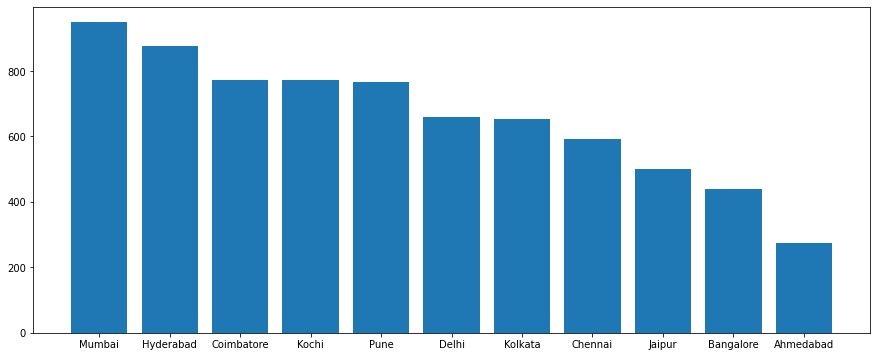

In [187]:
data_loca=data['Location'].value_counts()
fig,ax=plt.subplots(figsize=(15,6))
plt.bar(data_loca.index,data_loca.values,bottom=None)
plt.show()
#꽤나 고르게 분포되어있다. 

#Year

In [188]:
data['Year'].value_counts() #매우 옛날의 모형도 있다. 개수가 한자리 수 인것은 없애주도록 하자. 

2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
2008    207
2007    148
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2001      8
2000      5
1998      4
1999      2
1996      1
Name: Year, dtype: int64

In [189]:
outliers=data[(data['Year']==1996)|(data['Year']==1999)|(data['Year']==1999)|(data['Year']==2000)|(data['Year']==2001)]
data.loc[outliers.index,'Year']=None #1999년,1998년,1996년,2000년,2001년값을 none으로 바꾸어주고 
data["Year"]=data["Year"].dropna() #none값을 모두 drop한다. 

In [190]:
data['Year'].value_counts() #제거가 되었음을 확인할 수 있다. 

2015.0    929
2014.0    925
2016.0    886
2013.0    791
2017.0    709
2012.0    690
2011.0    579
2010.0    407
2018.0    361
2009.0    252
2008.0    207
2007.0    148
2019.0    119
2006.0     89
2005.0     68
2004.0     35
2003.0     20
2002.0     18
1998.0      4
Name: Year, dtype: int64

#Kilometers_Driven

In [191]:
data['Kilometers_Driven'].value_counts()
data['Kilometers_Driven'].describe() 
#이산형 변수이므로 종속변수와 산점도를 그려보자. 
#최솟값과 최대값의 차이가 많이 나는 편이다..혹시 모르니 이상치 탐지를 위한 boxplot을 먼저 그려보자 

count    7.253000e+03
mean     5.869906e+04
std      8.442772e+04
min      1.710000e+02
25%      3.400000e+04
50%      5.341600e+04
75%      7.300000e+04
max      6.500000e+06
Name: Kilometers_Driven, dtype: float64

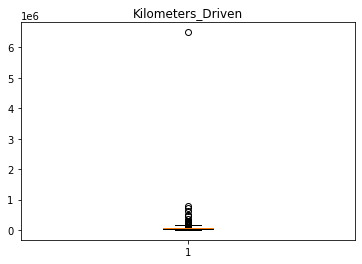

In [192]:
plt.boxplot(data['Kilometers_Driven'],whis=2.0)
plt.title('Kilometers_Driven')
plt.show()

In [193]:
#이상치정제하는 함수 구현 
def outliers_iqr(dt,col):
  quartile_1,quartile_3=np.percentile(dt[col],[25,75])
  iqr=quartile_3-quartile_1
  lower_whis=quartile_1-(iqr*2.0)
  upper_whis=quartile_3+(iqr*2.0)
  outliers=dt[(dt[col]>upper_whis)|(dt[col]<lower_whis)]
  return outliers[[col]]

outliers=outliers_iqr(data,'Kilometers_Driven')
outliers  # 총 136개의 이상치 

,Kilometers_Driven
29,262000
64,178000
77,230000
181,216000
230,200000
...,...
7047,158000
7149,183513
7200,190000
7213,170000


In [194]:
data.loc[outliers.index,'Kilometers_Driven']=None #이상치를 Nan으로 변경 
data['Kilometers_Driven']=data['Kilometers_Driven'].fillna(data['Kilometers_Driven'].mean()) #평균값으로 대체해주자. 

In [195]:
#산점도를 그리기 전, 종속변수인 Price에는 결측값이 있으므로 평균치로 대체해서 넣어주자. 
data['Price']=data['Price'].fillna(data["Price"].mean())

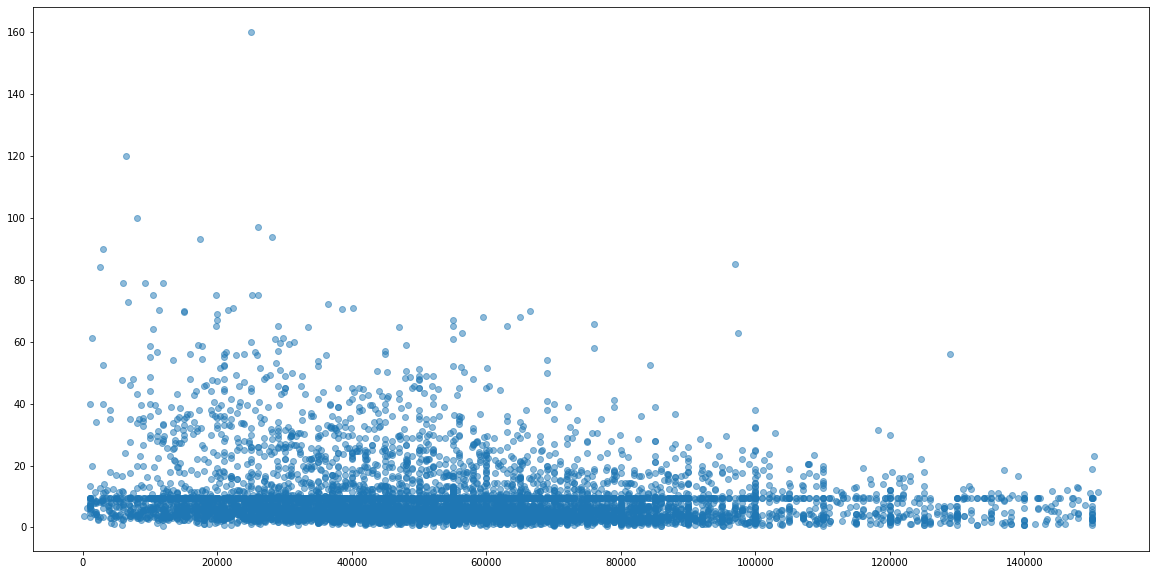

In [196]:
plt.subplots(figsize=(20,10))
plt.scatter(x=data['Kilometers_Driven'],y=data['Price'],alpha=0.5)
plt.show()
#주행한 거리가 작을수록 차의 price가 높음을 확인할 수 있다. 

#fuel_type

In [197]:
data['Fuel_Type'].value_counts()
#두연료에 굉장히 몰려있다! 나머지 3개는 그냥 없애주도록 하자. 

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

In [198]:
outliers=data[(data['Fuel_Type']=='CNG')|(data['Fuel_Type']=='LPG')|(data['Fuel_Type']=='Electric')]
data.loc[outliers.index,'Fuel_Type']=None #1999년,1998년,1996년,2000년,2001년값을 none으로 바꾸어주고 
data["Fuel_Type"]=data["Fuel_Type"].dropna() #none값을 모두 drop한다. 

In [199]:
data['Fuel_Type'].value_counts()

Diesel    3852
Petrol    3325
Name: Fuel_Type, dtype: int64

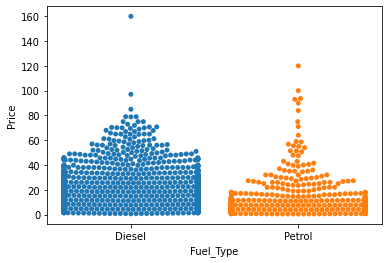

In [ ]:
#연료타입에 따른 가격을 산점도로 그려보자. 
#data['Fuel_Type'] = data.index
sns.swarmplot(x='Fuel_Type',y='Price',data=data)
plt.show()
#petrol연료가 가격이 낮은편에 속함을 확인할 수 있다. 

#Transmission

In [201]:
data['Transmission'].value_counts()
# 위와 같이 가격에 대한 산점도를 그려보자. 

Manual       5204
Automatic    2049
Name: Transmission, dtype: int64

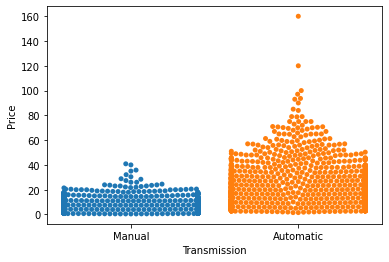

In [ ]:

sns.swarmplot(x='Transmission',y='Price',data=data)
plt.show()
#Automatic의 경우 price가 더 높은 것을 확인할 수 있다. 

#Owner_Type

In [203]:
data['Owner_Type'].value_counts()
#거의 직접구매에 몰려있으므로 유의미하지 않을것이라 생각하여 파생변수에서 제외하자. 

First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64

#Mileage

In [204]:
data['Mileage'].value_counts()

17.0 kmpl     207
18.9 kmpl     201
18.6 kmpl     144
21.1 kmpl     106
20.36 kmpl    105
             ... 
22.8 km/kg      1
8.0 kmpl        1
7.81 kmpl       1
14.47 kmpl      1
17.15 kmpl      1
Name: Mileage, Length: 450, dtype: int64

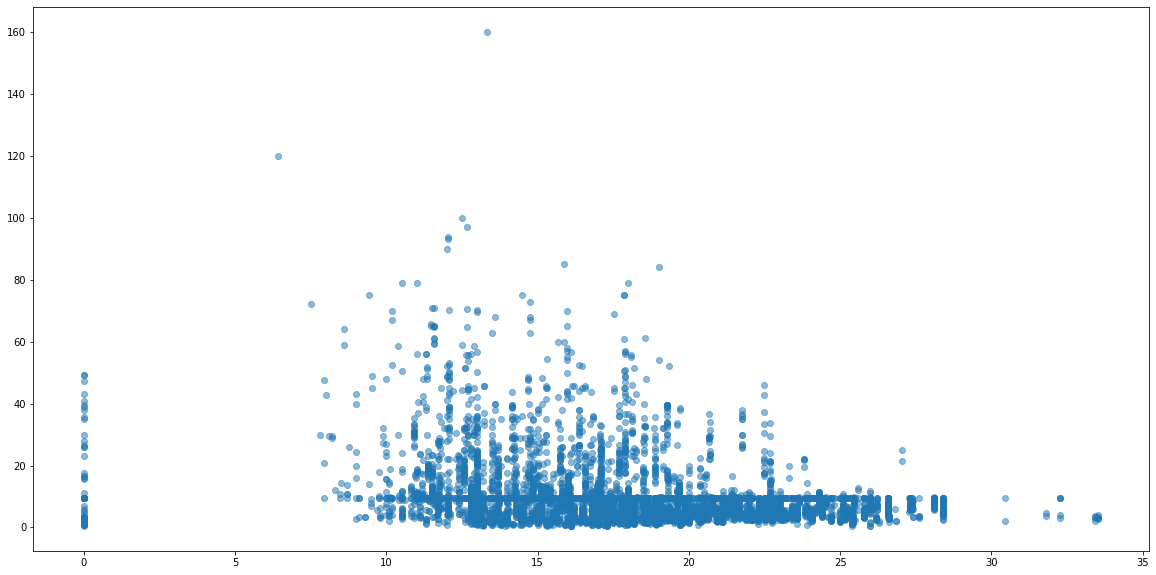

In [205]:
data['Mileage']=data['Mileage'].str.replace('kmpl','')
data['Mileage']=data['Mileage'].str.replace('km/kg','').astype('float') 

plt.subplots(figsize=(20,10))
plt.scatter(x=data['Mileage'],y=data['Price'],alpha=0.5)
plt.show()
#큰 인사이트는 얻을 수 없었다. 

#Engine

In [206]:
data['Engine'].value_counts()

1197 CC    732
1248 CC    610
1498 CC    370
998 CC     309
1198 CC    281
          ... 
1489 CC      1
1422 CC      1
2706 CC      1
1978 CC      1
1389 CC      1
Name: Engine, Length: 150, dtype: int64

In [207]:
data['Engine']=data['Engine'].str.replace('CC','').astype('float') 


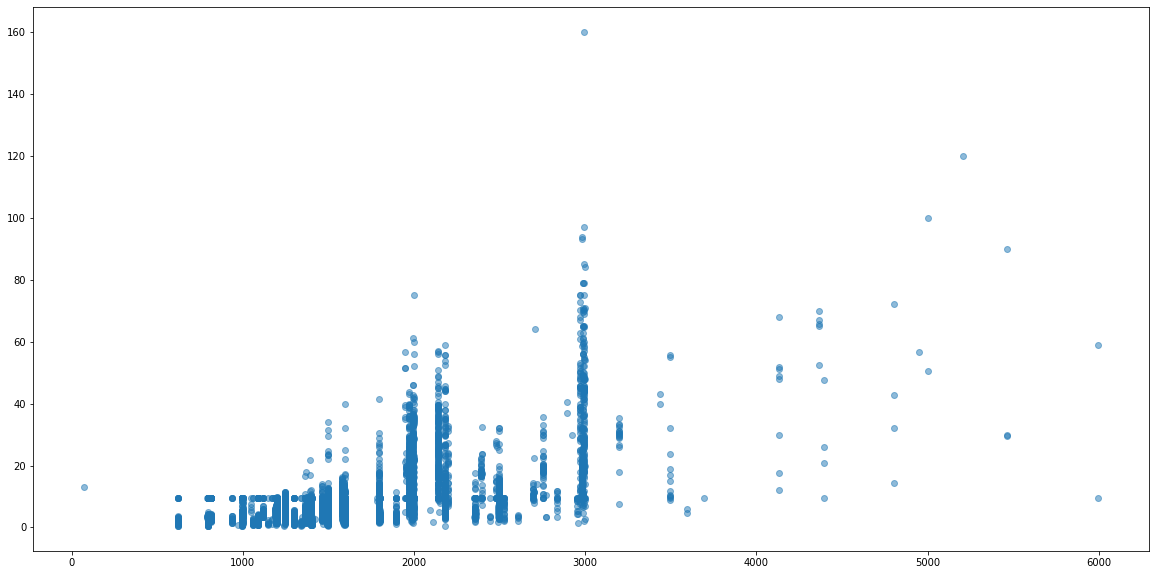

In [208]:
plt.subplots(figsize=(20,10))
plt.scatter(x=data['Engine'],y=data['Price'],alpha=0.5)
plt.show()
#엔진 용량이 클수록 가격이 높은것 같지만 전체수가 달라서 정확히 구분이 불가하다. 

#Seats

In [209]:
data['Seats'].value_counts()
#너무 몰려있어서 유의미하지 않다고 판단 .

5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dtype: int64

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7237 non-null   float64
 4   Kilometers_Driven  7253 non-null   float64
 5   Fuel_Type          7177 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              7253 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 793.4+ KB


#변수선택법 

In [211]:
from pandas.core.common import apply_if_callable
import time
import itertools
import statsmodels.api as sm
import statsmodels.formula.api as smf
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
# 전진선택법
def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['Intercept']) if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y,            feature_set=predictors+[p]+['Intercept']))
        
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in")
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) -1):
        results.append(processSubset(X=X, y= y,        feature_set = list(combo)+['Intercept']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on",          len(predictors) -1, "predictors in", (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,         'AIC:',best_model[0] )

    return best_model
# 단계적 선택법
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['Intercept'])['AIC']

    for i in range(1, len(X.columns.difference(['Intercept'])) +1):
        Forward_result = forward(X=X, y=y, predictors=predictors) 
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k !='Intercept']
        Backward_result = backward(X=X, y=y, predictors=predictors)

        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k !='Intercept']
            print('backward')

        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return (Stepmodels['model'][len(Stepmodels['model'])])

In [212]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
y,X=dmatrices('Price ~ Location + Year + Kilometers_Driven+Fuel_Type+Transmission+Mileage+Engine',
              data=data,return_type='dataframe')

In [213]:
models=Stepwise_model(X=X,y=y)


Processed  16 models on 1 predictors in
Selected predictors: ['Engine', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f61f996de20>
forward
Processed  1 models on 0 predictors in 0.0037169456481933594
Selected predictors: ['Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f61f997bd30>
Processed  15 models on 2 predictors in
Selected predictors: ['Engine', 'Year', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f61f997b8e0>
forward
Processed  2 models on 1 predictors in 0.01888251304626465
Selected predictors: ['Engine', 'Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f620c02eca0>
Processed  14 models on 3 predictors in
Selected predictors: ['Engine', 'Year', 'Transmission[T.Manual]', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f61f997be80>
forward
Processed  

In [214]:
models.summary()
#이 모델로 전체 데이터의 53.7%를 설명할 수 있다. 
#최종 파생변수로는 가장 영향을 많이 주는 Year,Transmission,Location,Fuel_Type을 사용하겠다. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     750.0
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:54:35   Log-Likelihood:                -23912.
No. Observations:                7116   AIC:                         4.785e+04
Df Residuals:                    7104   BIC:                         4.793e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Engine                     0.0085      0.000     47.314      0.000       0.008       0.009
Year                       0.6327      0.033     19.436      0.000       0.569       0.696
Transmission[T.Manual]    -5.5147      0.218    -25.346      0.000      -5.941      -5.088
Kilometers_Driven      -5.266e-05   3.71e-06    -14.193      0.000   -5.99e-05   -4.54e-05
Location[T.Mumbai]        -1.3635      0.271     -5.035      0.000      -1.894      -0.833
Location[T.Kolkata]       -1.5989      0.312     -5.118      0.000      -2.211      -0.986
Fuel_Type[T.Petrol]       -0.9382      0.200     -4.695      0.000      -1.330      -0.546
Location[T.Coimbatore]     1.5374      0.291      5.285      0.000       0.967       2.108
Location[T.Hyderabad]      1.0101      0.273      3.702      0.000       0.475       1.545
Location[T.Bangalore]      0.9917      0.364      2.724      0.006       0.278       1.705
Location[T.Delhi]         -0.7381      0.306     -2.413      0.016      -1.338      -0.139
Intercept              -1270.8196     65.731    -19.334      0.000   -1399.671   -1141.968
==============================================================================
Omnibus:                     5410.006   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           285567.328
Skew:                           3.153   Prob(JB):                         0.00
Kurtosis:                      33.387   Cond. No.                     4.93e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [215]:
x_data=data.loc[:,['Year','Transmission','Location','Fuel_Type']]
x_data

,Year,Transmission,Location,Fuel_Type
0,2010.0,Manual,Mumbai,NaN
1,2015.0,Manual,Pune,Diesel
2,2011.0,Manual,Chennai,Petrol
3,2012.0,Manual,Chennai,Diesel
4,2013.0,Automatic,Coimbatore,Diesel
...,...,...,...,...
7248,2011.0,Manual,Hyderabad,Diesel
7249,2015.0,Automatic,Mumbai,Petrol
7250,2012.0,Manual,Kolkata,Diesel
7251,2013.0,Automatic,Pune,Petrol


In [216]:
x_data=pd.get_dummies(data=x_data,columns=['Location']) #설명변수에서 범주형 변수 원핫인코딩 해주기
x_data=pd.get_dummies(data=x_data,columns=['Transmission'])
x_data=pd.get_dummies(data=x_data,columns=['Fuel_Type']) 



In [217]:
#Year변수에 결측값이 있으므로 평균값으로 대체 
x_data['Year']=x_data['Year'].fillna(x_data['Year'].mean().astype(int))

In [218]:
x_data.head()

,Year,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Transmission_Automatic,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Petrol
0,2010.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,2015.0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
2,2011.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
3,2012.0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
4,2013.0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


#모델링 

In [219]:
x_data=x_data[['Year','Transmission_Automatic','Transmission_Manual','Location_Ahmedabad','Location_Bangalore','Location_Chennai','Location_Coimbatore',
             'Location_Delhi','Location_Hyderabad','Location_Jaipur','Location_Kochi','Location_Kolkata','Location_Mumbai','Location_Pune',
             'Fuel_Type_Diesel','Fuel_Type_Petrol'
             ]].to_numpy()
y_data=data[['Price']].to_numpy()

In [220]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(x_data,y_data,test_size=0.2,random_state=42)
print(train_input.shape,train_target.shape)
print(test_input.shape,test_target.shape)

(5802, 16) (5802, 1)
(1451, 16) (1451, 1)


In [221]:
from sklearn.preprocessing import StandardScaler #스탠다드 스케일링 
mm=StandardScaler()
mm.fit(train_input)
train_scaled=mm.transform(train_input)
test_scaled=mm.transform(test_input)
print(train_scaled.shape,test_scaled.shape)

(5802, 16) (1451, 16)


#poly변수 만들기 

In [232]:
from sklearn.preprocessing import PolynomialFeatures # 좀더 정규한 모델을 만들기 위해서 다중회귀방정식을 만들어보자. 
poly_reg=PolynomialFeatures(degree=2) #교차항을 허용하여 3까지 변수 생성 
x_poly=poly_reg.fit_transform(train_scaled)
x_test_poly=poly_reg.transform(test_scaled)


In [233]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_poly,train_target)

LinearRegression()

In [234]:
 #회귀 계수 출력 
print(lr.score(x_poly,train_target)) #훈련세트 스코어 
print(lr.score(x_test_poly,test_target)) #테스트 세트 스코어 

0.45099103182750266
0.48853734624905076


In [243]:
from sklearn.metrics import mean_squared_error,mean_absolute_error #회귀진단 
pred=lr.predict(x_test_poly)
mse=mean_squared_error(test_target,pred)
mae=mean_absolute_error(test_target,pred)
r2 = r2_score(test_target,pred)
rmse=np.sqrt(mse)
acc=lr.score(poly_reg.transform(test_scaled),test_target)
print(mse)
print(mae)
print(r2)
print(rmse)
print(acc)



49.58591445797372
4.141243876411665
0.48853734624905076
7.041726667371698
0.48853734624905076


#결정트리 회귀 모델 

In [236]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_poly,train_target)

DecisionTreeRegressor()

In [237]:
print(dtr.score(x_poly,train_target)) #훈련세트 스코어 
print(dtr.score(x_test_poly,test_target)) 

0.533146715053756
0.3798407654076703


In [238]:
from sklearn.model_selection import GridSearchCV #교차검증과 하이퍼파라미터조절을 같이해주는 그리드서치를 이용함. 
param_grid = {'criterion':['mse'], 'max_depth':[None,2,3,4,5,6]}
gs=GridSearchCV(dtr,param_grid,n_jobs=-1,cv=3,scoring='r2',verbose=1) #재현율의 성능을 높이는 것으로 기준 정확도는 이미 높다고 생각. 
gs.fit(x_poly,train_target)
dt=gs.best_params_
print(dt) #최고의 파라미터 출력 
print(gs.best_score_)
#r2스코어가 linear_regression보다 작음...

Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'criterion': 'mse', 'max_depth': 2}
0.3986456414589185


#xgb회귀 

[12:10:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Predictions made on traning data : [ 6.5210752  7.617803   4.978656  ...  5.824568  12.057149   7.4351964]
R2 score on trainig data : 0.45809614612573024
MSE on traning data : 52.53716560845956
Mean Absolute error on traning data 4.118602014876946


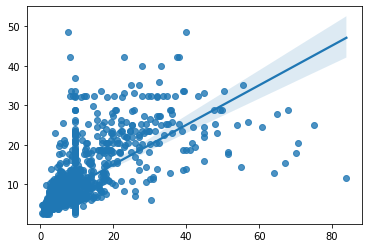

In [242]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
xgb= XGBRegressor()
xgb.fit(x_poly,train_target)

xgb_pred = xgb.predict(x_test_poly)
print("Predictions made on traning data :",xgb_pred)

xgb_r2 = r2_score(test_target,xgb_pred)
print("R2 score on trainig data :",xgb_r2) #r2스코어의 값이 Linear_regression보다 높다. 

xgb_mse = mean_squared_error(test_target,xgb_pred)
print("MSE on traning data :",xgb_mse)

xgb_mae = mean_absolute_error(test_target,xgb_pred)
print("Mean Absolute error on traning data",xgb_mae)

sns.regplot(test_target,xgb_pred)